In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies

In [ ]:
# This is used to download BTC data from AlphaVantage

crypt = CryptoCurrencies('WQ8W67GO6PP73AD4', output_format = 'pandas')

In [ ]:
btc_av = crypt.get_digital_currency_daily('BTC', market='USD')[0]

In [ ]:
btc_av = pd.DataFrame(btc_av)

In [ ]:
btc_av

,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),5. volume,6. market cap (USD)
date,,,,,,,,,,
2021-03-31,58746.57,58746.57,58970.44,58970.44,58631.65,58631.65,58913.16,58913.16,1011.482708,1011.482708
2021-03-30,57635.46,57635.46,59368.00,59368.00,57071.35,57071.35,58746.57,58746.57,55122.443122,55122.443122
2021-03-29,55777.65,55777.65,58405.82,58405.82,54800.01,54800.01,57635.47,57635.47,67857.937398,67857.937398
2021-03-28,55817.14,55817.14,56559.75,56559.75,54691.84,54691.84,55777.63,55777.63,39050.387511,39050.387511
2021-03-27,55025.59,55025.59,56700.36,56700.36,53950.00,53950.00,55817.14,55817.14,50105.475055,50105.475055
...,...,...,...,...,...,...,...,...,...,...
2018-07-10,6662.78,6662.78,6681.00,6681.00,6263.00,6263.00,6296.91,6296.91,38560.672702,38560.672702
2018-07-09,6712.10,6712.10,6802.06,6802.06,6612.24,6612.24,6662.12,6662.12,26732.406550,26732.406550
2018-07-08,6753.48,6753.48,6780.00,6780.00,6667.44,6667.44,6712.10,6712.10,24622.947794,24622.947794


Initial exploration suggests that the API only provides data for a time period of 3 years. To supplement this, additional data has to be obtained. Apart from that, there seems to be columns of repeated values. 

In [ ]:
btc_av = btc_av[['1a. open (USD)', '2a. high (USD)', '3a. low (USD)', '4a. close (USD)', '5. volume']]

In [ ]:
btc_av

,1a. open (USD),2a. high (USD),3a. low (USD),4a. close (USD),5. volume
date,,,,,
2021-03-31,58746.57,58970.44,58631.65,58913.16,1011.482708
2021-03-30,57635.46,59368.00,57071.35,58746.57,55122.443122
2021-03-29,55777.65,58405.82,54800.01,57635.47,67857.937398
2021-03-28,55817.14,56559.75,54691.84,55777.63,39050.387511
2021-03-27,55025.59,56700.36,53950.00,55817.14,50105.475055
...,...,...,...,...,...
2018-07-10,6662.78,6681.00,6263.00,6296.91,38560.672702
2018-07-09,6712.10,6802.06,6612.24,6662.12,26732.406550
2018-07-08,6753.48,6780.00,6667.44,6712.10,24622.947794


In [ ]:
# changing name of columns 

btc_av.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

In [ ]:
btc_av.index.names = ['Date']
btc_av

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-31,58746.57,58970.44,58631.65,58913.16,1011.482708
2021-03-30,57635.46,59368.00,57071.35,58746.57,55122.443122
2021-03-29,55777.65,58405.82,54800.01,57635.47,67857.937398
2021-03-28,55817.14,56559.75,54691.84,55777.63,39050.387511
2021-03-27,55025.59,56700.36,53950.00,55817.14,50105.475055
...,...,...,...,...,...
2018-07-10,6662.78,6681.00,6263.00,6296.91,38560.672702
2018-07-09,6712.10,6802.06,6612.24,6662.12,26732.406550
2018-07-08,6753.48,6780.00,6667.44,6712.10,24622.947794


In [ ]:
# Gathering data using yahoo finance api till the first date provided by alpha vantage
btc_yf = yf.download('BTC-USD', end='2018-06-26')

[*********************100%***********************]  1 of 1 completed


In [ ]:
btc_yf

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2018-06-22,6737.879883,6747.080078,6006.600098,6083.689941,6083.689941,5079810048
2018-06-23,6090.100098,6224.819824,6071.810059,6162.479980,6162.479980,3431360000
2018-06-24,6164.279785,6223.779785,5826.410156,6173.229980,6173.229980,4566909952


In [ ]:
# Dropping 'Adj Close' 

btc_yf = btc_yf.drop(['Adj Close'], axis = 1)

Combining the dataframes taken from alpha vantage and yahoo finance 

The first observation is the sequence of dates in both the dataframes is opposite of each other. The combination can be done as follows:
- Change the sequence of dates in the alpha vantage dataframe
- Append the columns to the yahoo finance data frame 

In [ ]:
# Reversing the dataframe for alpha vantage 

btc_av = btc_av.iloc[::-1]

In [ ]:
btc_av

,Open,High,Low,Close,Volume
Date,,,,,
2018-07-06,6529.20,6648.54,6425.00,6609.78,29397.094748
2018-07-07,6609.79,6818.16,6508.88,6756.98,23973.876886
2018-07-08,6753.48,6780.00,6667.44,6712.10,24622.947794
2018-07-09,6712.10,6802.06,6612.24,6662.12,26732.406550
2018-07-10,6662.78,6681.00,6263.00,6296.91,38560.672702
...,...,...,...,...,...
2021-03-27,55025.59,56700.36,53950.00,55817.14,50105.475055
2021-03-28,55817.14,56559.75,54691.84,55777.63,39050.387511
2021-03-29,55777.65,58405.82,54800.01,57635.47,67857.937398


In [ ]:
# Concatanating dataframes 

BTC = pd.concat([btc_yf, btc_av])

In [ ]:
BTC

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,2.105680e+07
2014-09-18,456.859985,456.859985,413.104004,424.440002,3.448320e+07
2014-09-19,424.102997,427.834991,384.532013,394.795990,3.791970e+07
2014-09-20,394.673004,423.295990,389.882996,408.903992,3.686360e+07
2014-09-21,408.084991,412.425995,393.181000,398.821014,2.658010e+07
...,...,...,...,...,...
2021-03-27,55025.590000,56700.360000,53950.000000,55817.140000,5.010548e+04
2021-03-28,55817.140000,56559.750000,54691.840000,55777.630000,3.905039e+04
2021-03-29,55777.650000,58405.820000,54800.010000,57635.470000,6.785794e+04


The dataframe, BTC, now conatins data about bitcoin prices and volume from 17/9/14 till 22/03/21

The data for all the other factors can now be collected using the yahoo finance api. This has to be done between the dates that were used for the BTC dataframe.  
The data will be collected for: 
- S&P500 index ('GSPC') 
- Dow Jones Industrial Average ('DJI')
- NASDAQ Composite ('IXIC')
- NYSE COMPOSITE ('NYSE')
- NYSE AMEX COMPOSITE INDEX ('XAX')
- Cboe UK 100 ('BUK100P)
- FTSE ('FTSE')
- EURONEXT ('N100')
- Nikkei ('N225')
- S&P BSE SENSEX ('BSESN')
- HANG SENG INDEX ('HSI')
- S&P/ASX 200 ('AXJO') 
- SSE Composite Index ('000001.SS')
- Shenzhen Component ('399001.SZ')
- Jakarta Composite Index ('JKSE')

In [ ]:
indices = yf.download(['^GSPC','^DJI','^IXIC','^NYA','^N225','^BSESN','^AXJO','^NSEI','^GSPTSE','^KS11'], 
                      start='2014-09-17', end='2021-03-22')

[*********************100%***********************]  10 of 10 completed


In [ ]:
indices = indices['Close']

In [ ]:
combined = pd.concat([BTC['Close'],indices], join='inner', axis=1)

In [ ]:
combined.columns = ['Bitcoin','^AXJO','^BSESN','^DJI','^GSPC','^GSPTSE','^IXIC','^KS11','^N225','^NSEI','^NYA']

In [ ]:
combined 

,Bitcoin,^AXJO,^BSESN,^DJI,^GSPC,^GSPTSE,^IXIC,^KS11,^N225,^NSEI,^NYA
Date,,,,,,,,,,,
2014-09-17,457.334015,5407.299805,26631.289062,17156.849609,2001.569946,15458.900391,4562.189941,2062.610107,15888.669922,7975.500000,10973.740234
2014-09-18,424.440002,5415.799805,27112.210938,17265.990234,2011.359985,15465.500000,4593.430176,2047.739990,16067.570312,8114.750000,11024.059570
2014-09-19,394.795990,5433.100098,27090.419922,17279.740234,2010.400024,15265.400391,4579.790039,2053.820068,16321.169922,8121.450195,10989.570312
2014-09-22,402.152008,5363.000000,27206.740234,17172.679688,1994.290039,15129.000000,4527.689941,2039.270020,16205.900391,8146.299805,10892.639648
2014-09-23,435.790985,5415.700195,26775.689453,17055.869141,1982.770020,15125.700195,4508.689941,2028.910034,NaN,8017.549805,10815.419922
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-16,56900.750000,6827.100098,50363.960938,32825.949219,3962.709961,18874.000000,13471.570312,3067.169922,29921.089844,14910.450195,15669.299805
2021-03-17,58912.970000,6795.200195,49801.621094,33015.371094,3974.120117,18983.099609,13525.200195,3047.500000,29914.330078,14721.299805,15731.150391
2021-03-18,57648.160000,6745.899902,49216.519531,32862.300781,3915.459961,18836.500000,13116.169922,3066.010010,30216.750000,14557.849609,15589.089844


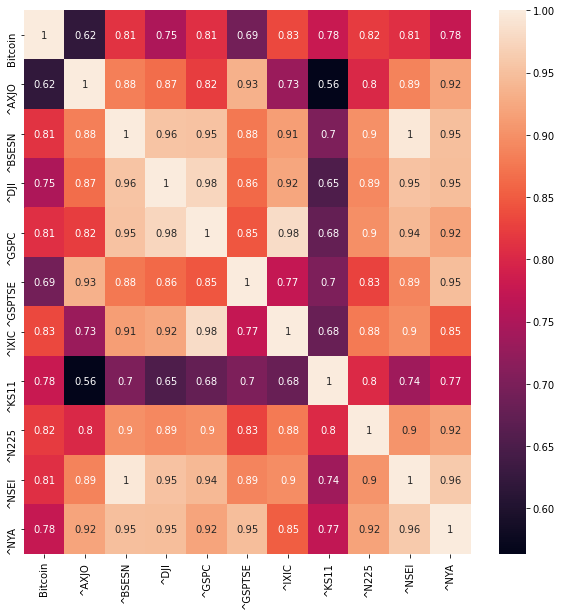

In [ ]:
plt.figure(figsize = (10,10))
sb.heatmap(combined.corr(), annot=True)

In [ ]:
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

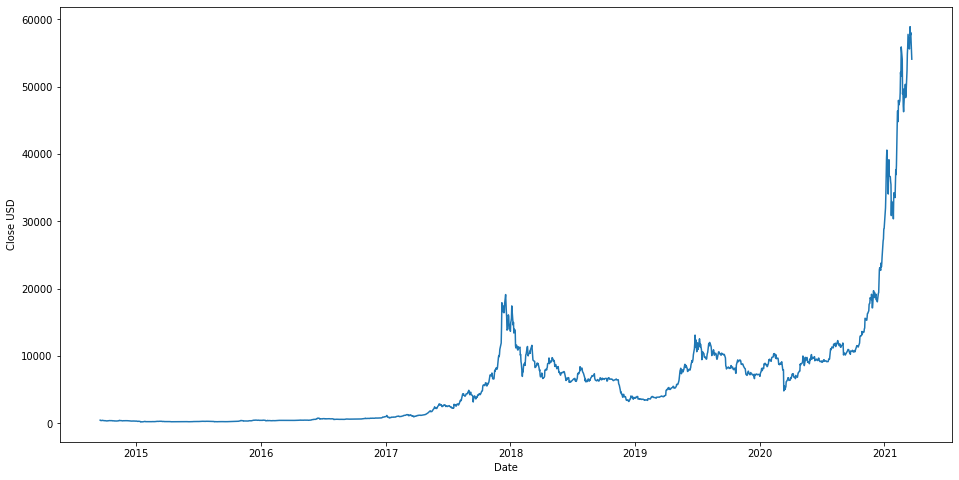

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(combined['Bitcoin'])
plt.xlabel('Date')
plt.ylabel('Close USD')
plt.show()

In [ ]:
training_data_len = math.ceil( len(combined['Bitcoin']) * 0.8) # 80% of the data will be used to train the model
training_data_len

1351

In [ ]:
# Scale the data for bitcoin

scaler = MinMaxScaler(feature_range=(0,1))
Bitcoin = np.array(combined[['Bitcoin']])
scaled_data = scaler.fit_transform(Bitcoin)

In [ ]:
scaled_data

array([[0.00475409],
       [0.00419405],
       [0.00368934],
       ...,
       [0.97846577],
       [0.98496702],
       [0.91777082]])

In [ ]:
# creating the training dataset

training_data = scaled_data[:training_data_len, :]

#Split the data into x_train and y_train

x_train = []
y_train = []

for i in range(30, len(training_data)):
  x_train.append(training_data[i-30:i,0])
  y_train.append(training_data[i, 0])

In [ ]:
# Convert x_train and y_train into numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1321, 30, 1)

In [ ]:
#Build the LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model

model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1321/1321 [==============================] - 22s 14ms/step - loss: 7.0320e-04
Epoch 2/5
1321/1321 [==============================] - 20s 15ms/step - loss: 2.1516e-04
Epoch 3/5
1321/1321 [==============================] - 19s 15ms/step - loss: 8.8304e-05
Epoch 4/5
1321/1321 [==============================] - 19s 15ms/step - loss: 1.0177e-04
Epoch 5/5
1321/1321 [==============================] - 21s 16ms/step - loss: 8.4882e-05


In [ ]:
#Create the testing dataset 

test_data = scaled_data[training_data_len - 30:, :]

#Create testing datasets: x_test, y_test

x_test = []
y_test = Bitcoin[training_data_len:,:]

for i in range(30, len(test_data)):
  x_test.append(test_data[i-30:i,0])


In [ ]:
#Convert data to numpy array 
x_test = np.array(x_test)

In [ ]:
#Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) #Change 1 with the number of variables 

In [ ]:
#Get the models predicted price value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #Unscaling values to obtain actual values instead of values between [0,1]

In [ ]:
#Getting root mean squared error (RMSE)

rmse = np.sqrt( np.mean(predictions - y_test)**2)

In [ ]:
rmse

32.44626072190286

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


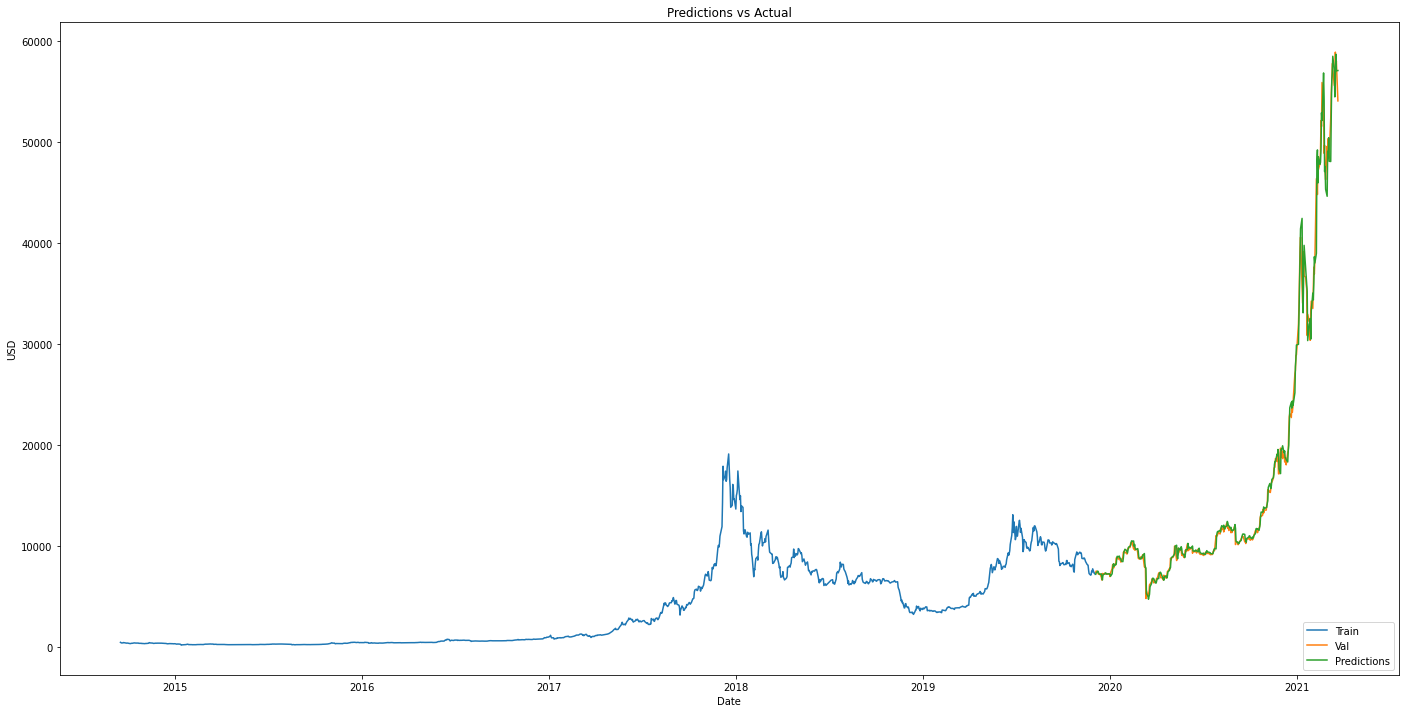

In [ ]:
data = combined.filter(['Bitcoin'])
# Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize
plt.figure(figsize = (24,12))
plt.title('Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('USD')
plt.plot(train['Bitcoin'])
plt.plot(valid[['Bitcoin','Predictions']])
plt.legend(['Train','Val', 'Predictions'], loc = 'lower right')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


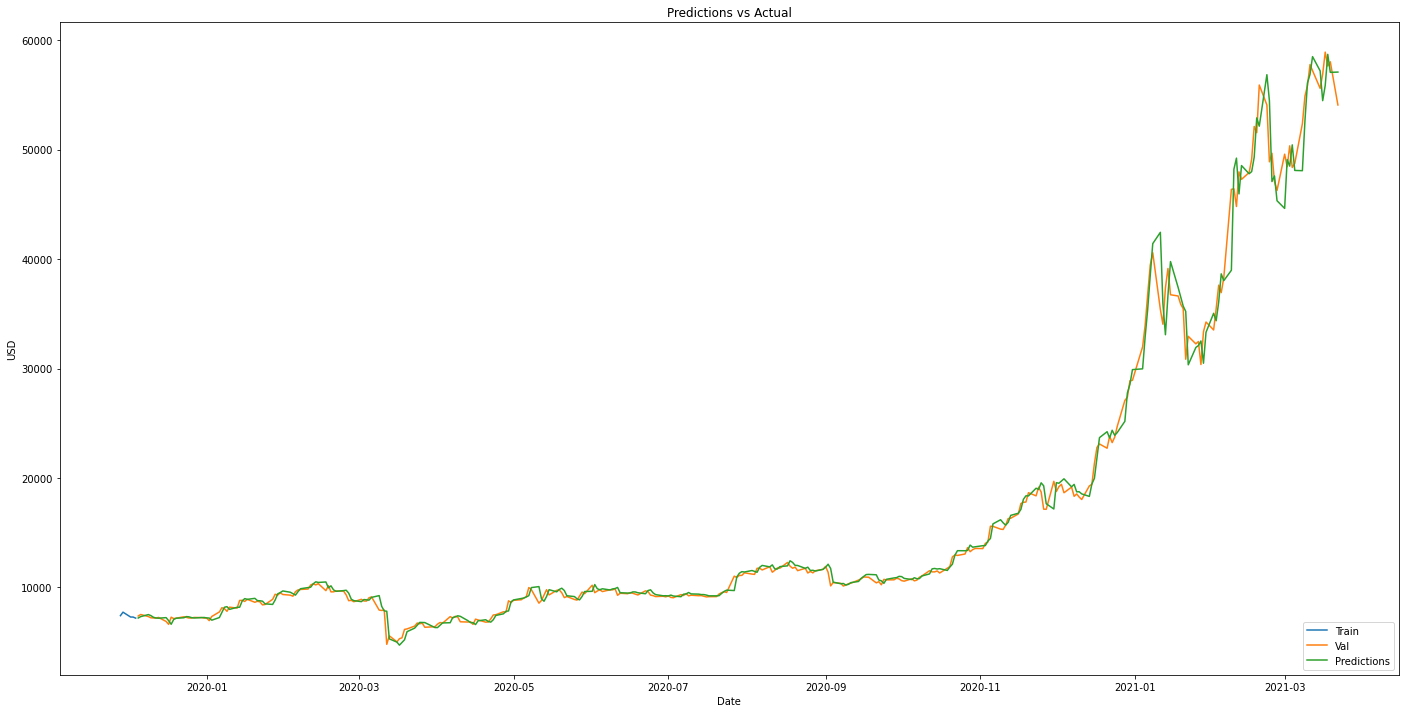

In [ ]:
data = combined.filter(['Bitcoin'])
# Plot the data 
train = data[training_data_len - 5:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize
plt.figure(figsize = (24,12))
plt.title('Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('USD')
plt.plot(train['Bitcoin'])
plt.plot(valid[['Bitcoin','Predictions']])
plt.legend(['Train','Val', 'Predictions'], loc = 'lower right')